In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [73]:
titanic_df = pd.read_csv('/Users/tomatsutakuya/Desktop/ml_dataset/data/titanic_train.csv')

In [78]:
titanic_df.shape

(891, 9)

# データの前処理

In [76]:
#　不要なデータを削除
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [135]:
titanic_df.head(5)

,PassengerId,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,1,0,1,0,7.2500,S,22.0,4
1,2,1,1,0,71.2833,C,38.0,1
2,3,1,0,0,7.9250,S,26.0,3
3,4,1,1,0,53.1000,S,35.0,1
4,5,0,0,0,8.0500,S,35.0,4


In [79]:
titanic_df[titanic_df.isnull().any(1)].head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,NaN,0,0,8.4583,Q
17,18,1,2,male,NaN,0,0,13.0000,S
19,20,1,3,female,NaN,0,0,7.2250,C
26,27,0,3,male,NaN,0,0,7.2250,C
28,29,1,3,female,NaN,0,0,7.8792,Q
29,30,0,3,male,NaN,0,0,7.8958,S
31,32,1,1,female,NaN,1,0,146.5208,C
32,33,1,3,female,NaN,0,0,7.7500,Q
36,37,1,3,male,NaN,0,0,7.2292,C
42,43,0,3,male,NaN,0,0,7.8958,C


In [82]:
#　AGEカラムの欠損値を中央値で補完
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

titanic_df[titanic_df.isnull().any(1)]
#titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
AgeFill        float64
dtype: object

In [88]:
#　性別を数値変換
titanic_df['Gender'] = titanic_df['Sex'].map({'female':0, 'male':1}).astype(int)

In [89]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
#titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,1,0,3,male,22.0,1,0,7.2500,S,22.000000,1,4
1,2,1,1,female,38.0,1,0,71.2833,C,38.000000,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,26.000000,0,3
3,4,1,1,female,35.0,1,0,53.1000,S,35.000000,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,35.000000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,27.000000,1,3
887,888,1,1,female,19.0,0,0,30.0000,S,19.000000,0,1
888,889,0,3,female,NaN,1,2,23.4500,S,29.699118,0,3
889,890,1,1,male,26.0,0,0,30.0000,C,26.000000,1,2


In [99]:
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender', 'Age'], axis=1)

KeyError: "['Pclass' 'Sex' 'Gender' 'Age'] not found in axis"

# 学習

In [113]:
from sklearn.linear_model import LogisticRegression

In [108]:
#　説明変数を用意
data = titanic_df.loc[:, ['AgeFill', 'Pclass_Gender']].values

In [111]:
# 目的変数を用意
label = titanic_df.loc[:, ['Survived']].values

In [114]:
model = LogisticRegression()

In [115]:
model.fit(data, label)

/Users/tomatsutakuya/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [126]:
model.predict([[10, 1]])

array([1])

In [131]:
model.predict_proba([[10, 1]])

array([[0.03754749, 0.96245251]])

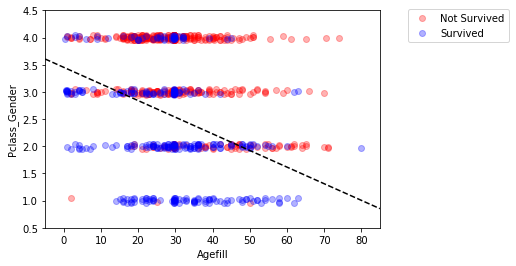

In [133]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

index_survived = titanic_df[titanic_df['Survived']==0].index
index_notsurvived = titanic_df[titanic_df['Survived']==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
levels = np.linspace(0, 1.0)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                           titanic_df.loc[index_survived, 'Pclass_Gender'] + (np.random.rand(len(index_survived))-0.5)*0.1,
                           color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                           titanic_df.loc[index_notsurvived, 'Pclass_Gender'] + (np.random.rand(len(index_notsurvived))-0.5)*0.1,
                           color='b', label='Survived', alpha=0.3)
ax.set_xlabel('Agefill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

x1 = xmin
x2 = xmax
y1 = -1 * (model.intercept_[0] + model.coef_[0][0] * xmin)/model.coef_[0][1]
y2 = -1 * (model.intercept_[0] + model.coef_[0][0] * xmax)/model.coef_[0][1]
ax.plot([x1, x2], [y1, y2], 'k--')

# モデルの評価

In [155]:
from sklearn.model_selection import train_test_split

In [158]:
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
print(traindata.shape, trainlabel.shape)

(712, 2) (712, 1)


In [160]:
eval_model = LogisticRegression()

In [161]:
predictor_eval = eval_model.fit(train(data, trainlabel).predict(testdata)

/Users/tomatsutakuya/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [162]:
eval_model.score(traindata, trainlabel)

0.7710674157303371

In [163]:
eval_model.score(testdata, testlabel)

0.7597765363128491

In [164]:
from sklearn import metrics
print(metrics.classification_report(testlabel, predictor_eval))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       107
           1       0.74      0.62      0.68        72

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179

